**Install necessary libraries and packages**

In [ ]:
!pip install torch
import torch
import pandas as pd
from tqdm.notebook import tqdm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**Import the data set**

In [ ]:
import pandas as pd
input_df = pd.read_csv('/content/Twitter_Data.csv')

**Only 20% of Data used for Training and Inference**

In [ ]:
df = input_df.sample(frac=0.2, random_state=42)

In [ ]:
df

,clean_text,category
90053,modi full too drama package with habbit eating...,1.0
44179,better show that “entire political science” de...,1.0
9998,you must say what you witnessed since 2014 you...,1.0
57234,who are they expect that janpath will congratu...,0.0
81150,bjp policy only divide and rule bjp propogand...,0.0
...,...,...
155202,you are the one that hates modi,0.0
86762,this the case why doesn’ modi announce prohibi...,-1.0
110509,can narendra modi placed leo now,0.0
72942,terror attacks have not killed zero civilians ...,-1.0


**Find the Null value**

In [ ]:
df.isnull().sum()

clean_text    0
category      0
label         0
data_type     0
dtype: int64

**Drop the null value**

In [ ]:
df.dropna(inplace=True)

**check after the Drop the null**

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

**Convert the label from folat to Integer**

In [ ]:
df['category'] = df['category'].astype(int)

In [ ]:
df

,clean_text,category
22511,even the world’ top economies fails provide 10...,-1
102942,vahiyat opinion hai tax bracket its okay for r...,1
127087,sir you will find insane lovers modi almost ne...,-1
15661,may loser but why dont you become winner telli...,0
64921,yadav jee your hate modi attitude has made you...,-1
...,...,...
123613,vajpayee has started the gst and modi has impl...,1
76395,mention abuses that congress has showered modi...,0
100806,modi’ stinky farts eagerly lapped the lap dog...,0
16757,\nindia launched 104 satellites one and now ai...,0


**Unique Value of label**

In [ ]:
unique_values = df['category'].unique()

In [ ]:
unique_values

array([ 1,  0, -1])

**Now Map the label to string**

In [ ]:
mapping = {
    -1: 'negative',
    0: 'neutral',
    1: 'positive'
}

# Apply the mapping
df['category'] = df['category'].map(mapping)

In [ ]:
df

,clean_text,category
90053,modi full too drama package with habbit eating...,positive
44179,better show that “entire political science” de...,positive
9998,you must say what you witnessed since 2014 you...,positive
57234,who are they expect that janpath will congratu...,neutral
81150,bjp policy only divide and rule bjp propogand...,neutral
...,...,...
155202,you are the one that hates modi,neutral
86762,this the case why doesn’ modi announce prohibi...,negative
110509,can narendra modi placed leo now,neutral
72942,terror attacks have not killed zero civilians ...,negative


In [ ]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31087 entries, 90053 to 28367
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  31087 non-null  object
 1   category    31087 non-null  object
dtypes: object(2)
memory usage: 728.6+ KB


In [ ]:
df.clean_text.iloc[10]

'that ques why did isro chairman drdo director not announce that  bcoz than modi wah wah nahi hoti '

**count number no label**

In [ ]:
df.category.value_counts()

category
positive    13818
neutral     10517
negative     6752
Name: count, dtype: int64

<ipython-input-30-9bd44cc90bb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.category, palette='Spectral')


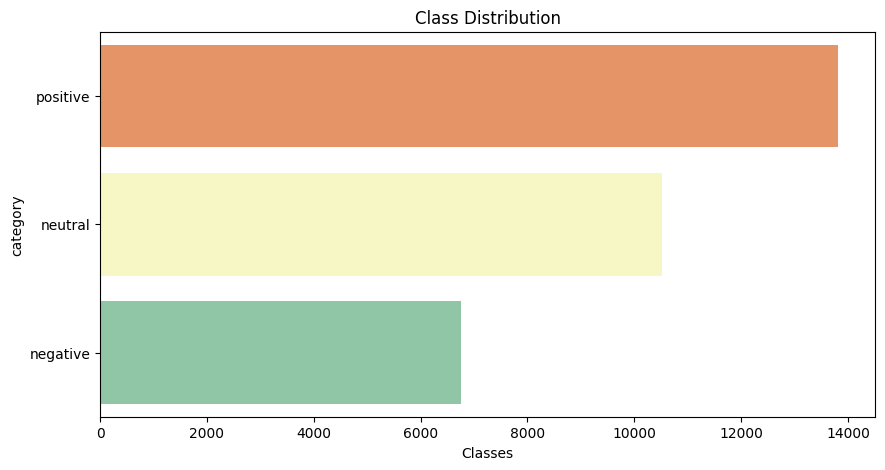

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(df.category, palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution');

In [ ]:
#store classes into an array
possible_labels = df.category.unique()
possible_labels

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
#convert labels into numeric values
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
label_dict

{'positive': 0, 'neutral': 1, 'negative': 2}

In [ ]:
#convert labels into numeric values
df['label'] = df.category.replace(label_dict)
df.head(10)

,clean_text,category,label
90053,modi full too drama package with habbit eating...,positive,0
44179,better show that “entire political science” de...,positive,0
9998,you must say what you witnessed since 2014 you...,positive,0
57234,who are they expect that janpath will congratu...,neutral,1
81150,bjp policy only divide and rule bjp propogand...,neutral,1
134586,support modi for better future india,positive,0
14041,new research from analyzed more than 9000 twee...,positive,0
59499,modi can defeated only modi decides not contes...,positive,0
50485,jee narendra modi quite elder and senior thn y...,neutral,1
140346,lutyens delhi better prepare the boy aka youth...,positive,0


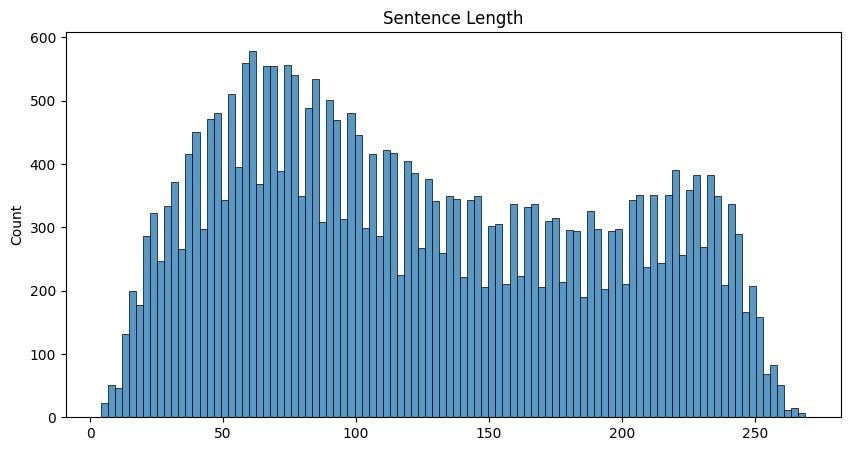

In [ ]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.clean_text], bins=100)
plt.title('Sentence Length')
plt.show()

**find the maximum length In clean Text**

In [ ]:
max_len = max([len(sent) for sent in df.clean_text])
print('Max length: ', max_len)

Max length:  269


In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                   df.label.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label.values)

**create new column**

In [ ]:
df['data_type'] = ['not_set'] * df.shape[0]
df.head()

,clean_text,category,label,data_type
90053,modi full too drama package with habbit eating...,positive,0,not_set
44179,better show that “entire political science” de...,positive,0,not_set
9998,you must say what you witnessed since 2014 you...,positive,0,not_set
57234,who are they expect that janpath will congratu...,neutral,1,not_set
81150,bjp policy only divide and rule bjp propogand...,neutral,1,not_set


In [ ]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

In [ ]:
df.groupby(['category', 'label', 'data_type']).count()

clean_text
category label data_type            
negative 2     train            5739
               val              1013
neutral  1     train            8939
               val              1578
positive 0     train           11745
               val              2073

In [ ]:
!pip install transformers

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

**load tokenizer**

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

**tokenize train set**

In [ ]:

encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].clean_text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 270,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


**tokenizer val set**

In [ ]:
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].clean_text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 270,
                                                return_tensors = 'pt')

In [ ]:
encoded_data_train

{'input_ids': tensor([[  101, 16913,  2072,  ...,     0,     0,     0],
        [  101,  2040,  2024,  ...,     0,     0,     0],
        [  101, 24954,  3343,  ...,     0,     0,     0],
        ...,
        [  101,  2064,  6583,  ...,     0,     0,     0],
        [  101,  7404,  4491,  ...,     0,     0,     0],
        [  101, 11948, 12848,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

Used for encode train set

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label.values)

**used for encode val set**

In [ ]:
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label.values)

In [ ]:
input_ids_train

tensor([[  101, 16913,  2072,  ...,     0,     0,     0],
        [  101,  2040,  2024,  ...,     0,     0,     0],
        [  101, 24954,  3343,  ...,     0,     0,     0],
        ...,
        [  101,  2064,  6583,  ...,     0,     0,     0],
        [  101,  7404,  4491,  ...,     0,     0,     0],
        [  101, 11948, 12848,  ...,     0,     0,     0]])

In [ ]:
attention_masks_train

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
labels_train

tensor([0, 1, 1,  ..., 1, 2, 0])

**create dataloader**

In [ ]:

dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                             attention_masks_val,
                             labels_val)

In [ ]:
print(len(dataset_train))
print(len(dataset_val))

26423
4664


In [ ]:
dataset_train

In [ ]:
dataset_train.tensors

(tensor([[  101, 16913,  2072,  ...,     0,     0,     0],
         [  101,  2040,  2024,  ...,     0,     0,     0],
         [  101, 24954,  3343,  ...,     0,     0,     0],
         ...,
         [  101,  2064,  6583,  ...,     0,     0,     0],
         [  101,  7404,  4491,  ...,     0,     0,     0],
         [  101, 11948, 12848,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 1, 1,  ..., 1, 2, 0]))

**load pre-trained BERT bert-base-uncased**

In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**model summary**

In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4
dataloader_train = DataLoader(dataset_train,sampler = RandomSampler(dataset_train),batch_size = batch_size)
dataloader_val = DataLoader(dataset_val,sampler = RandomSampler(dataset_val),batch_size = 32)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps = 0,num_training_steps = len(dataloader_train)*epochs)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [ ]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
def evaluate(dataloader_val):
    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total/len(dataloader_val)
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    model.train()
    loss_train_total = 0
    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

    tqdm.write('\nEpoch {epoch}')
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.5495109339078306


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.3921652176490768
F1 Score (weighted): 0.9207897344635848


Epoch 2:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.266881305562972


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.2583814689344152
F1 Score (weighted): 0.9474626429749421


Epoch 3:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.16610516178699286


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.24798745588436946
F1 Score (weighted): 0.955062575086003


Epoch 4:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.10209534198475068


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.28540207013623964
F1 Score (weighted): 0.9602995094978644


Epoch 5:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.07121351205999578


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.28077122513981245
F1 Score (weighted): 0.9598591364020658


Epoch 6:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.04978651868207544


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.279883486289392
F1 Score (weighted): 0.9602800452403086


Epoch 7:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.03205898196224416


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.2809153974668047
F1 Score (weighted): 0.9632378445180376


Epoch 8:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.01983422084303986


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.28953706928016437
F1 Score (weighted): 0.9643381408988039


Epoch 9:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.01006643199248116


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.33588328534264206
F1 Score (weighted): 0.9629412588949223


Epoch 10:   0%|          | 0/6606 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.006047419135905456


  0%|          | 0/146 [00:00<?, ?it/s]

Validation loss: 0.340330580828808
F1 Score (weighted): 0.9633357431237302


In [ ]:
outputs.loss

tensor(1.0053e-05, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
outputs.logits

tensor([[-4.3464, -3.5174,  7.9818],
        [ 8.2082, -3.8661, -4.4356],
        [ 8.3571, -3.9621, -4.6562]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
#save model
model.to(device)
pass

In [ ]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/146 [00:00<?, ?it/s]

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: positive
Accuracy:2006/2073

Class: neutral
Accuracy:1537/1578

Class: negative
Accuracy:950/1013



In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
model.eval()
predictions, true_vals = [], []

for batch in dataloader_val:
    batch = tuple(b.to(device) for b in batch)

    with torch.no_grad():
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        outputs = model(**inputs)

    logits = outputs[1]
    preds = logits.detach().cpu().numpy()
    label_ids = inputs['labels'].cpu().numpy()

    predictions.append(preds)
    true_vals.append(label_ids)

predictions = np.concatenate(predictions, axis=0)
true_vals = np.concatenate(true_vals, axis=0)

precision = precision_score(true_vals, np.argmax(predictions, axis=1), average='macro')
recall = recall_score(true_vals, np.argmax(predictions, axis=1), average='macro')
cm = confusion_matrix(true_vals, np.argmax(predictions, axis=1))

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(cm)


Precision: 0.9593
Recall: 0.9598
Confusion Matrix:
[[2006   27   40]
 [  18 1537   23]
 [  38   25  950]]
